In [11]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

df = pd.read_csv('HRDataset.csv')
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Figure size 1500x2500 with 0 Axes>

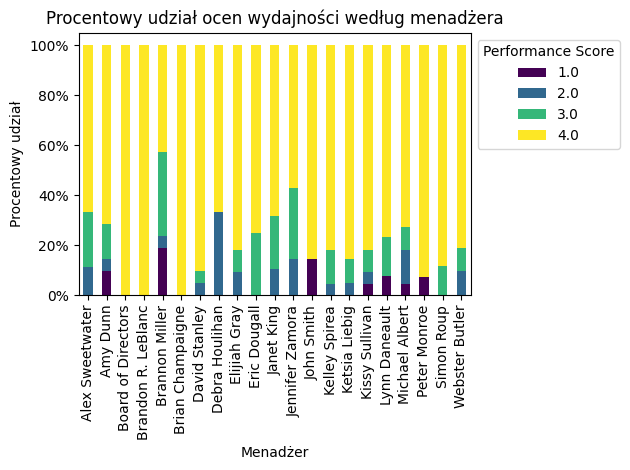

In [12]:
score_mapping = {"Fully Meets": 4, "Exceeds": 3, "Needs Improvement": 2, "PIP": 1}
df['PerformanceScoreNumeric'] = df['PerformanceScore'].map(score_mapping)

manager_performance = df.groupby('ManagerName')['PerformanceScoreNumeric'].value_counts(normalize=True).unstack(fill_value=0)

plt.figure(figsize=(15, 25))
ax = manager_performance.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Procentowy udział ocen wydajności według menadżera')
plt.xlabel('Menadżer')
plt.ylabel('Procentowy udział')
plt.xticks(rotation=90)
plt.legend(title='Performance Score', bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

In [13]:
print("#1. Oceny pracowników różnią się. Część z menadżerów wymaga więcej i skrupulatniej ocenia swoich pracowników, niektórzy są im przychylni.")

#1. Oceny pracowników różnią się. Część z menadżerów wymaga więcej i skrupulatniej ocenia swoich pracowników, niektórzy są im przychylni.


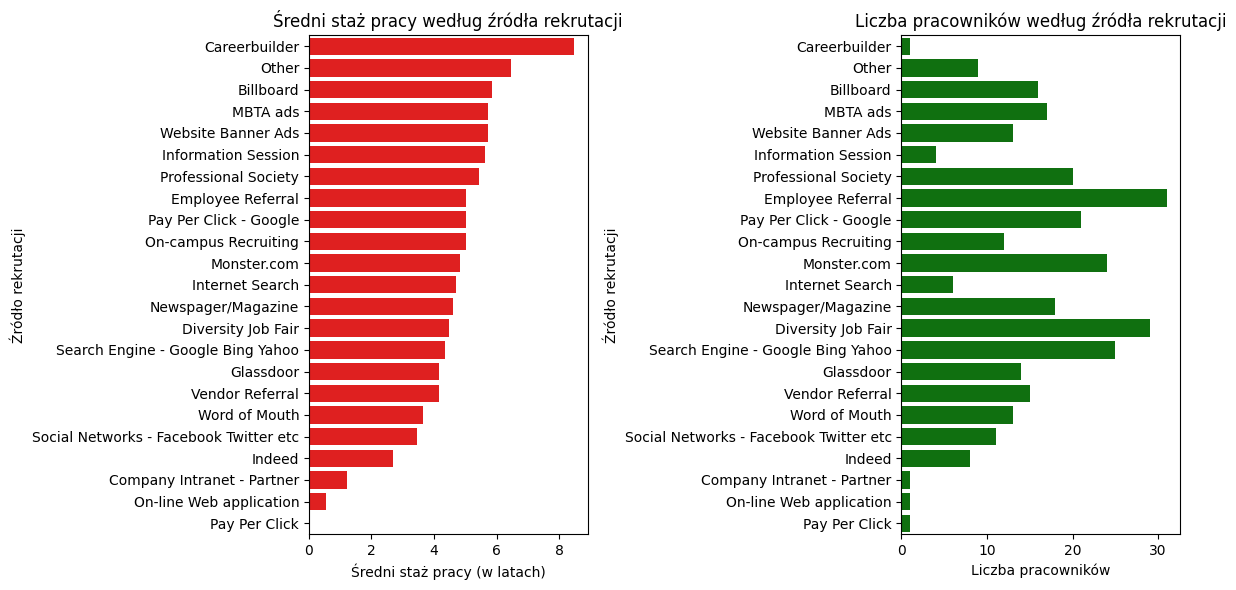

In [14]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire']).days / 365.25


df['Seniority'] = df.apply(count_seniority, axis=1)
source_seniority = df.groupby('RecruitmentSource')['Seniority'].mean().reset_index()
source_seniority = source_seniority.sort_values(by='Seniority', ascending=False)
source_counts = df['RecruitmentSource'].value_counts().reset_index()
source_counts.columns = ['RecruitmentSource', 'EmployeeCount']
combined_data = pd.merge(source_seniority, source_counts, on='RecruitmentSource')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Seniority', y='RecruitmentSource', data=combined_data, color='red')
plt.title('Średni staż pracy według źródła rekrutacji')
plt.xlabel('Średni staż pracy (w latach)')
plt.ylabel('Źródło rekrutacji')

plt.subplot(1, 2, 2)
sns.barplot(x='EmployeeCount', y='RecruitmentSource', data=combined_data, color='green')
plt.title('Liczba pracowników według źródła rekrutacji')
plt.xlabel('Liczba pracowników')
plt.ylabel('Źródło rekrutacji')

plt.tight_layout()
plt.show()

In [15]:
print("#2. Najlepszymi źródłami zatrudniania pracowników, patrząc przez pryzmat długości zatrudnienia to: Other, Billboard, MBTA ads oraz Website Banner Ads.")

#2. Najlepszymi źródłami zatrudniania pracowników, patrząc przez pryzmat długości zatrudnienia to: Other, Billboard, MBTA ads oraz Website Banner Ads.


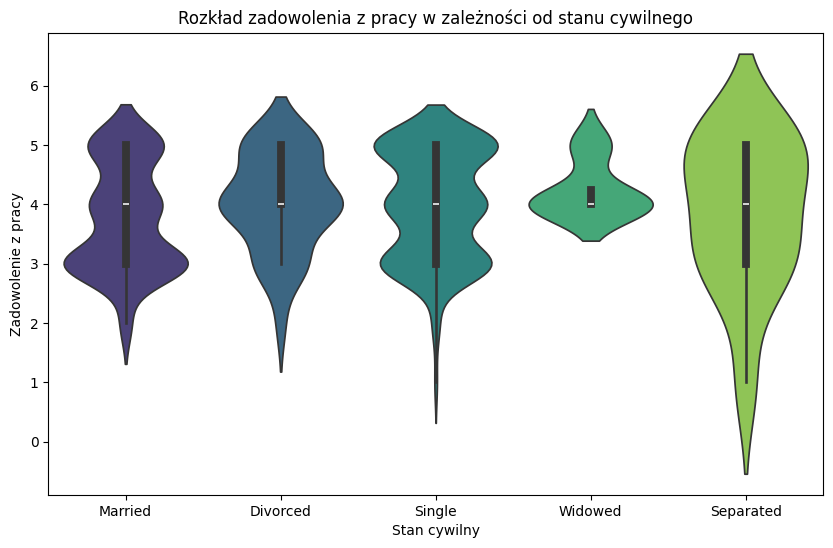

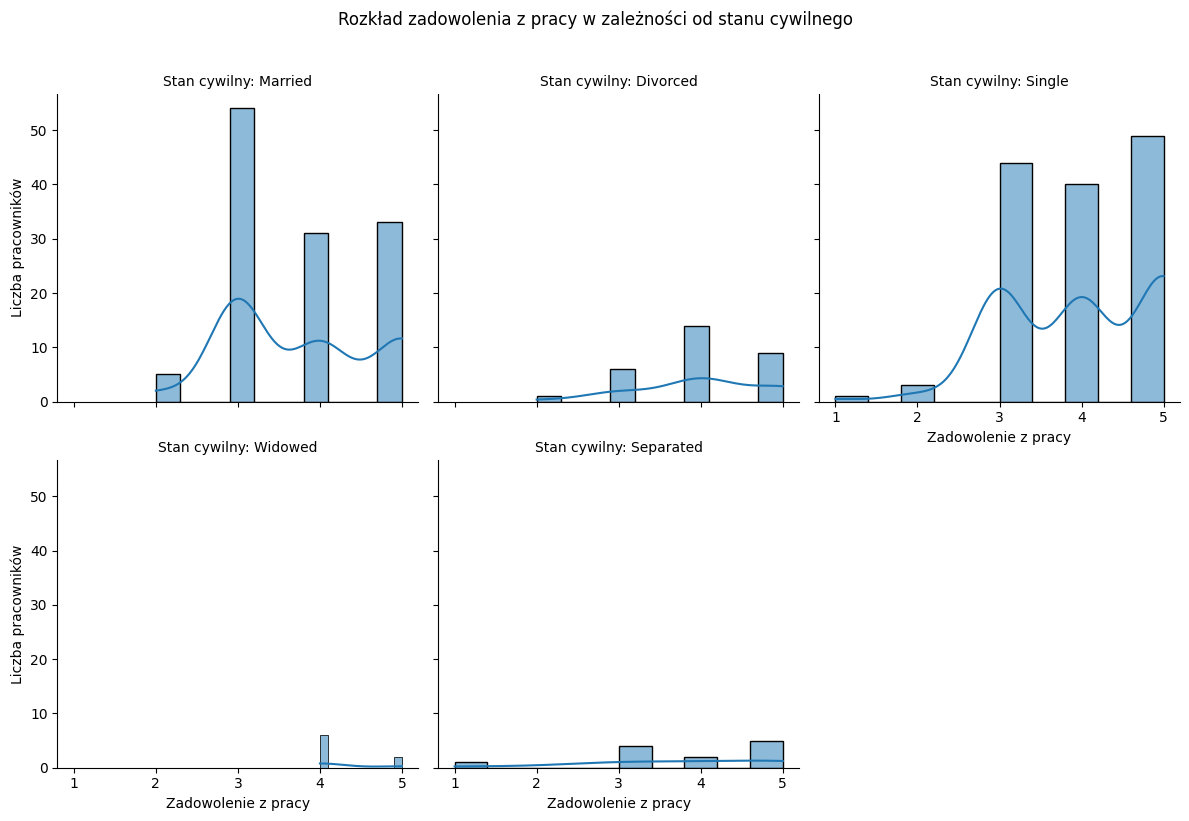

In [16]:
df_pairplot = df[['MaritalStatusID', 'EmpSatisfaction']].dropna()
df_pairplot['EmpSatisfaction'] = df_pairplot['EmpSatisfaction'].astype(float)

martial_mapping = {0: 'Single', 1: 'Married', 2: 'Divorced', 3: 'Separated', 4: 'Widowed'}
df_pairplot['MaritalStatus'] = df_pairplot['MaritalStatusID'].map(martial_mapping)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_pairplot, x='MaritalStatus', y='EmpSatisfaction', hue='MaritalStatus', palette='viridis', legend=False)
plt.xlabel('Stan cywilny')
plt.ylabel('Zadowolenie z pracy')
plt.title('Rozkład zadowolenia z pracy w zależności od stanu cywilnego')
plt.show()

g = sns.FacetGrid(df_pairplot, col="MaritalStatus", col_wrap=3, height=4, aspect=1)
g.map(sns.histplot, "EmpSatisfaction", bins=10, kde=True)
g.set_axis_labels("Zadowolenie z pracy", "Liczba pracowników")
g.set_titles("Stan cywilny: {col_name}")
plt.suptitle('Rozkład zadowolenia z pracy w zależności od stanu cywilnego', y=1.02)
plt.tight_layout()
plt.show()

In [17]:
print("#3. Tak, stan cywilny ma wpływ na zadowolenie z pracy. Gdy jest się w związku małżeńkim jest się średnio zadowolonym z pracy. W pozostałych przypadkach statusu cywilnego większość pracowników jest zadowolona lub bardzo zadowolona z pracy.")

#3. Tak, stan cywilny ma wpływ na zadowolenie z pracy. Gdy jest się w związku małżeńkim jest się średnio zadowolonym z pracy. W pozostałych przypadkach statusu cywilnego większość pracowników jest zadowolona lub bardzo zadowolona z pracy.


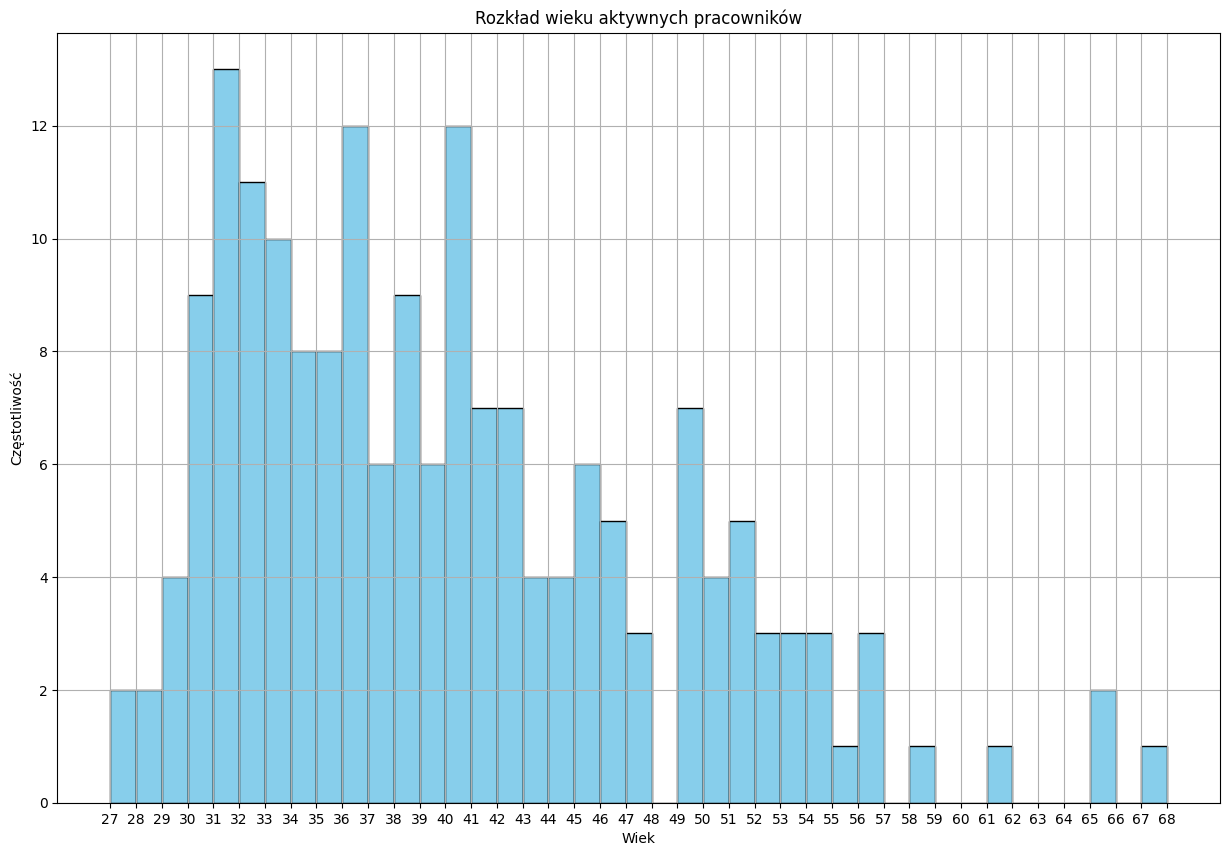

In [18]:
active_employees = df[df['EmploymentStatus'] == 'Active'].copy()
current_date = pd.to_datetime('2019-09-27')

active_employees['Age'] = current_date.year - df['DOB'].dt.year.apply(lambda x: x - 100 if x > 2000 else x)
active_employees['Age'] = active_employees['Age'].astype(int)
age_range = range(active_employees['Age'].min(), active_employees['Age'].max() + 1)

plt.figure(figsize=(15, 10))
plt.hist(active_employees['Age'], bins=age_range, color='skyblue', edgecolor='black')
plt.xlabel('Wiek')
plt.ylabel('Częstotliwość')
plt.title('Rozkład wieku aktywnych pracowników')
plt.xticks(age_range)
plt.grid(True)
plt.show()

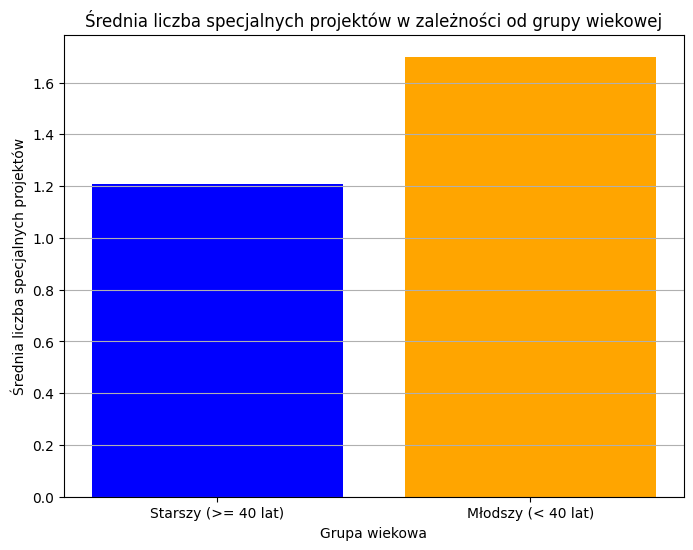

Średnia liczba specjalnych projektów dla pracowników starszych (>= 40 lat): 1.21
Średnia liczba specjalnych projektów dla pracowników młodszych (< 40 lat): 1.7


In [19]:
older_employees = active_employees[active_employees['Age'] >= 40]
younger_employees = active_employees[active_employees['Age'] < 40]

older_projects_count = older_employees['SpecialProjectsCount'].mean()
younger_projects_count = younger_employees['SpecialProjectsCount'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Starszy (>= 40 lat)', 'Młodszy (< 40 lat)'], [older_projects_count, younger_projects_count], color=['blue', 'orange'])
plt.xlabel('Grupa wiekowa')
plt.ylabel('Średnia liczba specjalnych projektów')
plt.title('Średnia liczba specjalnych projektów w zależności od grupy wiekowej')
plt.grid(axis='y')
plt.show()

print("Średnia liczba specjalnych projektów dla pracowników starszych (>= 40 lat):", round(older_projects_count, 2))
print("Średnia liczba specjalnych projektów dla pracowników młodszych (< 40 lat):", round(younger_projects_count, 2))